<a href="https://colab.research.google.com/github/matheussmoreira/pendulo/blob/main/pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
# METODOS NUMERICOS

# def calc_y(h, t, y, f):
#     k1 = h * f(t, y)
#     k2 = h * f(t+h/2, y+k1/2)
#     k3 = h * f(t+h/2, y+k2/2)
#     k4 = h * f(t+h, y+k3)
    
#     return y + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
# # End calc_y()

# def runge_kutta(t0, t1, h, y0, f):
#     ys = [y0]
#     ts = [t0]
    
#     ti = t0
#     yi = y0
#     tol = 1e-5
    
#     while (ti<t1 - tol):
#         # Ajusta passo largo
#         if (ti+h > t1):
#             h = t1 - ti
        
#         yi = calc_y(h, ti, yi, f)
#         ti += h
#         ts.append(ti)
#         ys.append(yi)
    
#     return [ts,ys]
# # End runge_kutta()

def runge_kutta_adapt(t0, t1, y0, f, h):
    ys = [y0]
    ts = [t0]
    
    tol = 1e-5
    ti = t0
    yi = y0
    
    while (ti<t1):
        # Ajusta passo largo
        if (ti+h > t1):
            h = t1 - ti
    
        y1 = calc_y(h, ti, yi, f)
        y2 = calc_y(h/2, ti, yi, f)
        y2 = calc_y(h/2, ti, y2, f)
        
        delta = (y2-y1)/15
        fator = pow(tol/math.fabs(delta), 1/5)
        
        if (fator >= 1.0):
            yi += y2+delta
            h = min(1.2, fator) * h
            ti += h


        else:
            h = 0.8 * fator * h

        ts.append(ti)
        ys.append(yi)

    return [ts,ys]
# End runge_kutta_adapt()

In [130]:
import math

# CONSTANTES FISICAS

# g = 9.8 # m/s^2
# l = 1.0 # m
# theta0 = math.pi/8

# FORMULAS PENDULO

# def derivada_2(t):
#     return -(g*theta0*math.cos(math.sqrt(g/l)*t))/l

# def mov_pendulo(theta,t):
#     return derivada_2(t) + g/l * math.sin(theta)

# def mov_pendulo_simp(theta,t):
#     return derivada_2(t) + g/l * theta

# def sol_analitica(t):
#     raiz = math.sqrt(g/l)
#     return theta0 * math.cos(raiz*t)

# def periodo_simp():
#     raiz = math.sqrt(l/g)
#     return 2 * math.pi * raiz

# def periodo(t1, t2, v1, v2):
#     div = abs(v1)/(abs(v1)+abs(v2))
#     diff = t2 - t1
#     return 2 * (t1 + div * diff)

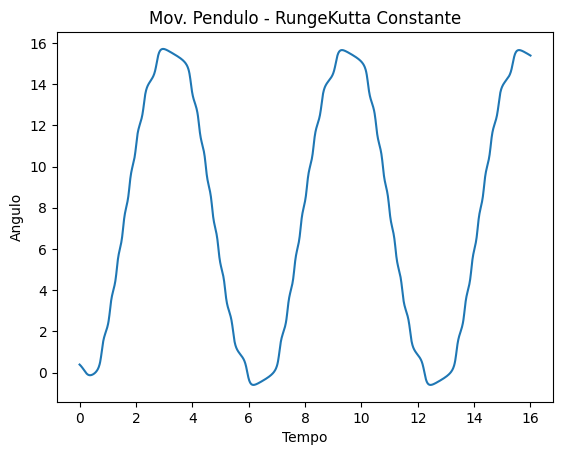

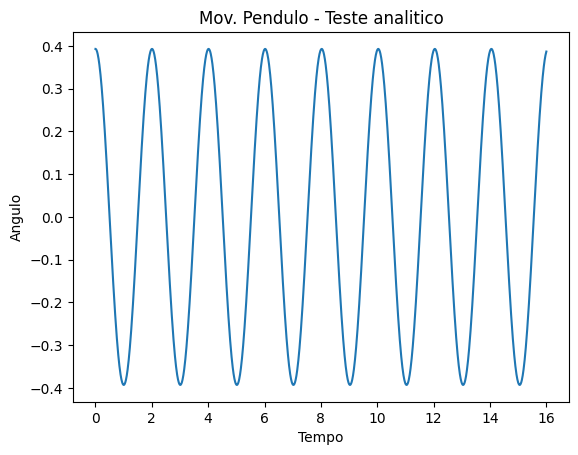

In [131]:
# MAIN

import matplotlib.pyplot as plt
import math

# Variaveis dos experimentos
h = 0.01

# Constantes
t0 = 0.0
t1 = 16 #periodo_simp()

# Resultados
ts, ys = runge_kutta(t0, t1, h, theta0, mov_pendulo)
# ts, ys = runge_kutta_adapt(t0, t1, theta0, mov_pendulo, h)

plt.plot(ts,ys)
plt.xlabel('Tempo')
plt.ylabel('Angulo')
plt.title('Mov. Pendulo - RungeKutta Constante')
plt.show()

t = 0.0
ts_anal = []
ys_anal = []
while t <= 16:
    ts_anal.append(t)
    ys_anal.append(sol_analitica(t))
    t += h

plt.plot(ts_anal,ys_anal)
plt.xlabel('Tempo')
plt.ylabel('Angulo')
plt.title('Mov. Pendulo - Teste analitico')
plt.show()